In [32]:
### NLP_Assign_6_Corona_Tweets_Sentiment_Analysis.ipynb

In [33]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [34]:
pip install GetOldTweets3

In [51]:
def get_tweets(start_date,end_date,topic):
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(topic) \
        .setSince(start_date) \
        .setUntil(end_date) \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [59]:
start_date_befor="2020-02-22"
end_date_befor="2020-03-23"
topic='#coronavirus'
tweets_before  = get_tweets(start_date_befor,end_date_befor,topic)

In [60]:
tweets_before[2]

['Coronavirus: IOC considers postponing 2020 Tokyo Olympics #Coronavirus ']

In [61]:
start_date_after="2020-03-24"
end_date_after="2020-04-23"
topic='#coronavirus'
tweets_after  = get_tweets(start_date_after,end_date_after,topic)

In [62]:
tweets_after[2]

['Are you out of work due to #coronavirus? Is your resume ready for when the country opens back up?']

In [63]:
# reading text file
text = ""
text_tweets = get_tweets(start_date_befor,end_date_befor,topic)

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words_before = cleaned_text.split()

In [64]:
# reading text file
text = ""
text_tweets = get_tweets(start_date_after,end_date_after,topic)

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words_after = cleaned_text.split()

In [68]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [69]:
# Removing stop words from the tokenized words list
final_words_befor = [word for word in tokenized_words_before if word not in stop_words]
final_words_after = [word for word in tokenized_words_after if word not in stop_words]

In [70]:
# Get emotions text
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions_corona.txt') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words_befor:
            emotion_list.append(emotion)

w_befor = Counter(emotion_list)
print(w_befor)

Counter({' fearless': 2, ' lost': 2, ' bored': 1, ' attracted': 1, ' adequate': 1, ' happy': 1, ' obsessed': 1, ' sad': 1, ' alone': 1, 'anxious': 1, 'anxiety': 1})


In [71]:
# Get emotions text
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions_corona.txt') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words_after:
            emotion_list.append(emotion)

w_after = Counter(emotion_list)
print(w_after)

Counter({'anxiety': 2, ' esteemed': 1, ' sad': 1, ' happy': 1, ' fearless': 1, ' attracted': 1, ' free': 1, ' powerless': 1})


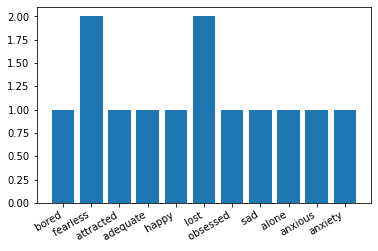

In [74]:
fig, ax1 = plt.subplots()
ax1.bar(w_befor.keys(), w_befor.values())
fig.autofmt_xdate()
#plt.savefig('graph.png')
plt.show()

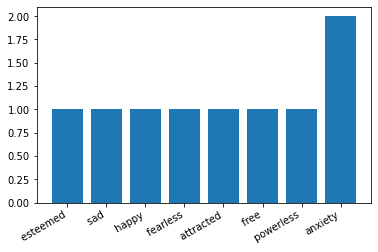

In [75]:
fig, ax1 = plt.subplots()
ax1.bar(w_after.keys(), w_after.values())
fig.autofmt_xdate()
#plt.savefig('graph.png')
plt.show()